# Mnist classification

### Exercise objectives
- Implement a CNN architecture with convolution layers
- Run a Neural Network on images

<hr>
<hr>

Let's imagine for a moment that you are working for the postal office (and you're in 1970 / 1980). You deal everyday with a enourmous amont of letters, and you want to automate the process of reading the numbers that have been handwritten. This task, called the _Handwriting Recognition_, has been a very complex that has been handled by Bell Labs (among other) where Yann Le Cun used to work, and where such things have been developed : 

![Number recognition](recognition.gif)


The idea is that you have an image (not a video: the animation is here to present what happens with different images) as an input and you try to predict the figure on the image - it corresponds to a classification task, where the output is the class (=figure) the image belongs to, from 0 to 9.

This task used to be quite complex back in the time, and still is a benchmark on which a lot of people work. For this reason, the MNIST (for *Modified ou Mixed National Institute of Standards and Technology*) dataset has been created: it corresponds to digit images, from 0 to 9. 

You goal in this notebook is to build a Convolution Neural Network that can work on such images and predict the corresponding class of each digit image. Keep in mind that this CNN will make you classify hand-written digits, which was a very complex task till the 90's. 

## The data

Keras provides multiple datasets within the Python package. You can load it with the following commands:

In [1]:
from tensorflow.keras import datasets

(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data(path="mnist.npz")

❓ Question ❓ Let's look at some of the data. 

Select some of the values of the train set and plot them thanks to the `imshow` function from matplotlib with `cmap` set to `gray`(otherwise, the displayed colors are just some arrangement Matplotlib does, which does not exist in practice).

9


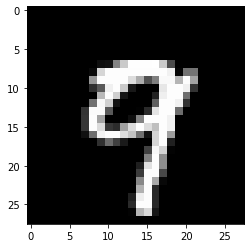

In [2]:
# YOUR CODE HERE
import matplotlib.pyplot as plt
%matplotlib inline 
image_index = 7890 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 9
plt.imshow(X_train[image_index], cmap='gray')

In [3]:
X_train.shape

(60000, 28, 28)

Remember that neural networks converge faster when the input data are somehow normalized? It goes similarly for input images. 

❓ Question ❓ As a first preprocessing step, you should normalize your data. For images, it simply implies to divide your input data by the maximal value, i.e. 255. Don't forget to do it on your train and test data.

(N.B.: you can also centered your data, by substracting 0.5 but it is not mandatory). 

In [4]:
# YOUR CODE HERE

# Making sure that the values are float so that we can get decimal points after division
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
X_train /= 255
X_test /= 255


❓ Question ❓ What is the shape of your images?

In [5]:
# YOUR CODE HERE
print('x_train shape:', X_train.shape)
print('shape of images in x_train', X_train.shape[0])
print('shape of images in x_test', X_test.shape[0])

x_train shape: (60000, 28, 28)
shape of images in x_train 60000
shape of images in x_test 10000


You see that you have 60.000 training images, all of size (28, 28). However, Keras needs images whose last dimension is the number of channels, which is missing here.

❓ Question ❓ Use the `expand_dims` to add one dimension at the end of the training and test data. Then, print the shape of X_train and X_test that should respectively be (60000, 28, 28, 1) and (10000, 28, 28, 1).

In [6]:
import numpy as np
# Make sure images have shape (28, 28, 1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print("x_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")



x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


A last thing to do to prepare your data is to convert your labels to one-hot encoded categories.

❓ Question ❓ Use `to_categorical` to transform your labels. Store the results in `y_train_cat` and `y_test_cat`.

In [7]:
import pandas as pd
# YOUR CODE HERE
#  valeurs catégoriques
y_train_cat  = pd.get_dummies(y_train).values
y_test_cat  = pd.get_dummies(y_test).values

In [8]:
print("La valeur {} est encodée vers le vecteur {}".format(y_train[0], y_train_cat[0]))
print("valeur {} transformée en vecteur: {}".format(y_train[20], y_train_cat[20]))

La valeur 5 est encodée vers le vecteur [0 0 0 0 0 1 0 0 0 0]
valeur 4 transformée en vecteur: [0 0 0 0 1 0 0 0 0 0]


The data are now ready to be used.

## The Convolutional Neural Network _aka_ CNN

Now, build a Convolutional Neural Network. 

❓ Question ❓ Based on the course, build a neural network that has:
- a `Conv2D` layer with 8 filters, each of size (4, 4), with an input shape suitable for your task, the relu activation function, and padding='same' so as to 
- a `MaxPool2D` layer with a pool_size of (2, 2)
- a second `Conv2D` layer with 16 filters, each of size (3, 3), and the relu activation function
- a second `MaxPool2D` layer with a pool_size of (2, 2)
- a `Flatten` layer
- a first `Dense` layer with 10 neurons and the relu activation function
- a last layer that is suited for your task

In the function, do not forget to include the compilation of the model, which optimizes the `categorical_crossentropy` with the adam optimizer - and the accuracy should be among the metrics.

In [13]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

def initialize_model():
    model =Sequential()
    ### First convolution & max-pooling
    # To complete
    model.add(Conv2D(8, (4, 4), activation="relu", padding='Same', input_shape = (28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2))),
    ### Second convolution & max-pooling
    # To complete
    model.add(Conv2D(filters =16, kernel_size=(3, 3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    ### Flattening
    # To complete
    model.add(Flatten())
    ### One fully connected
    # To completelayers
    model.add(Dense(10, activation='relu'))
    ### Last layer (let's say a classification with 10 output)
    # To complete
    model.add(Dense(10,activation='softmax'))
    ### Model compilation
    # To complete
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

In [14]:
model = initialize_model();

❓ Question ❓ How many trainable parameters are there in your model?
- Compute them with `model.summary()` first
- Recompute them manually layer per layer then

In [15]:
# YOUR CODE HERE:7,184
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 8)         136       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 16)        1168      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5770      
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

❓ Question ❓ Initialize your model and fit it on the train data. 
- Do not forget to use a validation set and an early stopping criterion. 
- Limit at 5 epoch max in this challenge (just to save time)

In [16]:
from tensorflow.keras.callbacks import EarlyStopping
# To complete
earlystopping=EarlyStopping(monitor="mean_squared_error", patience=40, verbose=1, mode='auto')
epochs = 5
output=model.fit(X_train, y_train, epochs=epochs, validation_split=0.1, validation_data=(X_test, y_test), callbacks=[earlystopping])


Epoch 1/5
1688/1688 [==============================] - 21s 12ms/step - loss: 0.6745 - accuracy: 0.7866 - val_loss: 0.0913 - val_accuracy: 0.9743
Epoch 2/5
1688/1688 [==============================] - 23s 14ms/step - loss: 0.1057 - accuracy: 0.9687 - val_loss: 0.0736 - val_accuracy: 0.9793
Epoch 3/5
1688/1688 [==============================] - 20s 12ms/step - loss: 0.0762 - accuracy: 0.9760 - val_loss: 0.0563 - val_accuracy: 0.9842
Epoch 4/5
1688/1688 [==============================] - 22s 13ms/step - loss: 0.0672 - accuracy: 0.9796 - val_loss: 0.0536 - val_accuracy: 0.9850
Epoch 5/5
1688/1688 [==============================] - 21s 13ms/step - loss: 0.0536 - accuracy: 0.9835 - val_loss: 0.0502 - val_accuracy: 0.9880


You probably see that the model converges within few epochs. The reason is that there are as many weight update as there are batches within each epoch. For instance, if you batch_size is of 32, you have 60.000/32 = 1875 updates.


❓ Question ❓ What is your accuracy on the test set?

In [17]:
# YOUR CODE HERE
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.047437552362680435
Test accuracy: 0.9846000075340271


### You should be already impressed by your skills! You solved what was a very hard problem 30 years ago with your CNN.

🏁 Congratulation!
